In [1]:
import pandas as pd
df = pd.read_csv('boston.csv')
X = df[['RM']]
y = df['MEDV']

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)

LinearRegression()

In [4]:
slr.coef_

array([9.10210898])

In [5]:
slr.intercept_

-34.67062077643857

In [6]:
y_pred = slr.predict(X)

In [7]:
slr.predict([[5]])

/Users/henrychen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10.83992413])

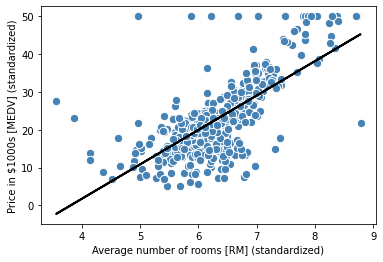

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X.values, y_pred, color='black', lw=2)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
slr2 = LinearRegression()
slr2.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = slr2.predict(X_train)
y_test_pred = slr2.predict(X_test)

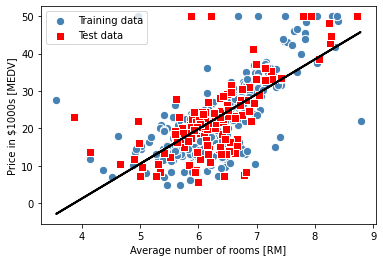

In [12]:
plt.scatter(X_train, y_train, c='steelblue', marker='o',
            edgecolor='white', s=70, label='Training data')
plt.scatter(X_test, y_test, c='red', marker='s',
            edgecolor='white', s=70, label='Test data')
plt.plot(X_train.values, y_train_pred, color='black', lw=2)
plt.legend(loc='upper left')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

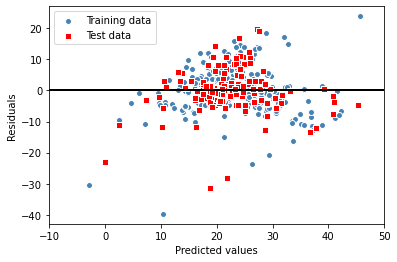

In [13]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='red', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
mean_squared_error(y_train, y_train_pred)

42.15765086312224

In [16]:
mean_squared_error(y_test, y_test_pred)

47.03304747975518

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_train, y_train_pred)

0.5026497630040827

In [19]:
r2_score(y_test, y_test_pred)

0.43514364832115193